In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Load data and get a peak at the data

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

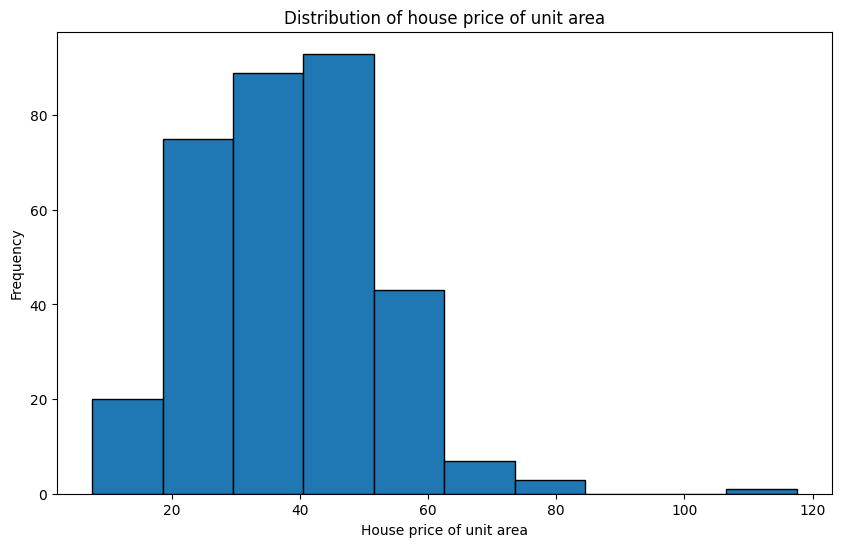

Max outlier:  117.5


In [2]:
real_estate_data = pd.read_csv('../data/Real estate.csv')
print(real_estate_data.head())

# Features (Xn), target (Y house price of unit area)
X = real_estate_data.drop(columns=['No', 'Y house price of unit area'])
Y = real_estate_data['Y house price of unit area']

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Any null?
print(X_train.isnull().sum())
# Result: No null values!

# How doees the target look?
plt.figure(figsize=(10, 6))
plt.hist(Y_train, edgecolor='black')
plt.title('Distribution of house price of unit area')
plt.xlabel('House price of unit area')
plt.ylabel('Frequency')
plt.show()

# Observation: One outlier in the target
print('Max outlier: ', Y_train.max())


#### Considerations from data analysis: 
Feature engineering:
- Convert dates to datetime objects (right now, it is YYYY.(percentage))
- X5 and X6: Latitude and Longitude (can we somehow unify them?)

### 2. TEST - Super simple model

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
model = LinearRegression()

model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

### 3. Very brief evaluation

R^2 score:  0.6810580555095636


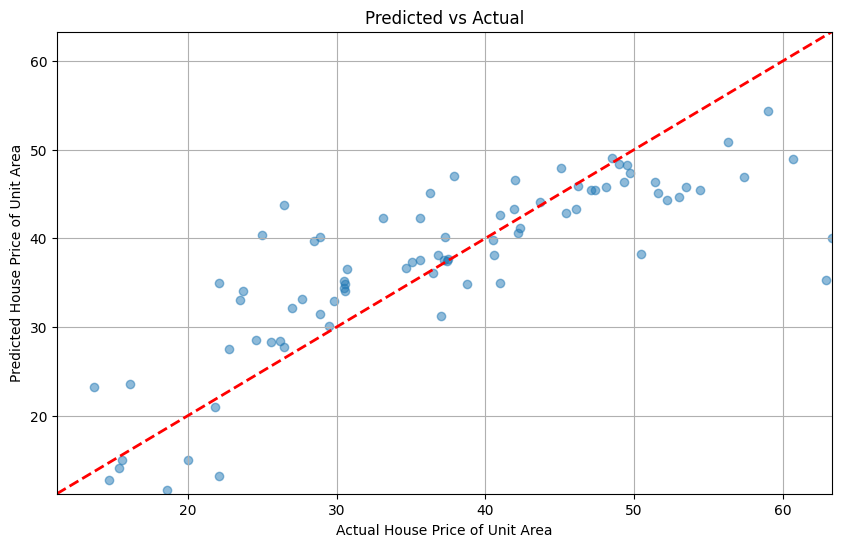

In [5]:
from sklearn.metrics import r2_score, confusion_matrix

print('R^2 score: ', r2_score(Y_test, Y_pred)) # result was 0.68 (meh not really that good...)

# Predictins vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicted vs Actual')
plt.xlabel('Actual House Price of Unit Area')
plt.ylabel('Predicted House Price of Unit Area')
plt.xlim(Y_test.min(), Y_test.max())
plt.ylim(Y_test.min(), Y_test.max())
plt.grid()
plt.show()

### 4. Save with pickle

In [6]:
import joblib

In [7]:
joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']